In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import re

In [15]:
ma= pd.read_csv('M&A.csv')
amz=pd.read_csv('amazon_stock.csv')
re=pd.read_csv('report2.csv')

In [17]:
ma

,Company_name,Company_Country,Company_Country_url,Company_Acquired_on,Company_Acquired_for,Company_Used_as
0,Bookpages,United Kingdom,https://en.wikipedia.org/wiki/United_Kingdom,"April 27, 1998","5,50,00,000",Amazon UK
1,Telebook,Germany,https://en.wikipedia.org/wiki/Germany,"April 27, 1998","55,000,000\nstock payment",Amazon Germany
2,IMDb,United Kingdom,https://en.wikipedia.org/wiki/United_Kingdom,"April 27, 1998","5,50,00,000",IMDb
3,Junglee,United States,https://en.wikipedia.org/wiki/United_States,"August 4, 1998","25,00,00,000",NaN
4,PlanetAll,United States,https://en.wikipedia.org/wiki/United_States,"August 4, 1998","28,00,00,000",NaN
...,...,...,...,...,...,...
109,GlowRoad,India,https://en.wikipedia.org/wiki/India,"April 21, 2022",—,NaN
110,One Medical,United States,https://en.wikipedia.org/wiki/United_States,"July 21, 2022","3,90,00,00,000",NaN
111,iRobot,United States,https://en.wikipedia.org/wiki/United_States,"August 5, 2022","1,42,00,00,000",NaN
112,Cloostermans,Belgium,https://en.wikipedia.org/wiki/Belgium,"September 9, 2022",NaN,NaN


In [19]:
ma['Company_Country'].value_counts()

Company_Country
United States           82
United Kingdom          10
India                    4
Israel                   3
France                   2
Canada                   2
United Arab Emirates     2
Germany                  1
China                    1
Spain                    1
Poland                   1
Netherlands              1
Italy                    1
Sweden                   1
Finland                  1
Belgium                  1
Name: count, dtype: int64

In [21]:
amz

,Date,Close,High,Low,Open,Volume
0,04-01-2010,6.695000,6.830500,6.657000,6.812500,151998000
1,05-01-2010,6.734500,6.774000,6.590500,6.671500,177038000
2,06-01-2010,6.612500,6.736500,6.582500,6.730000,143576000
3,07-01-2010,6.500000,6.616000,6.440000,6.600500,220604000
4,08-01-2010,6.676000,6.684000,6.451500,6.528000,196610000
...,...,...,...,...,...,...
3769,24-12-2024,229.050003,229.139999,226.130005,226.940002,15007500
3770,26-12-2024,227.050003,228.500000,226.669998,228.500000,16146700
3771,27-12-2024,223.750000,226.029999,220.899994,225.600006,27367100
3772,30-12-2024,221.300003,223.000000,218.429993,220.059998,28321200


In [23]:
#deleting the url column
ma=ma.drop(columns=['Company_Country_url'])



In [25]:
ma

,Company_name,Company_Country,Company_Acquired_on,Company_Acquired_for,Company_Used_as
0,Bookpages,United Kingdom,"April 27, 1998","5,50,00,000",Amazon UK
1,Telebook,Germany,"April 27, 1998","55,000,000\nstock payment",Amazon Germany
2,IMDb,United Kingdom,"April 27, 1998","5,50,00,000",IMDb
3,Junglee,United States,"August 4, 1998","25,00,00,000",NaN
4,PlanetAll,United States,"August 4, 1998","28,00,00,000",NaN
...,...,...,...,...,...
109,GlowRoad,India,"April 21, 2022",—,NaN
110,One Medical,United States,"July 21, 2022","3,90,00,00,000",NaN
111,iRobot,United States,"August 5, 2022","1,42,00,00,000",NaN
112,Cloostermans,Belgium,"September 9, 2022",NaN,NaN


In [27]:
import pandas as pd

# Load your dataset (if not already loaded)
ma = pd.read_csv("M&A.csv")

# Drop the web link column if present
if "Company_Country_url" in ma.columns:
    ma = ma.drop(columns=["Company_Country_url"])

# Normalize column names
ma.columns = [c.lower() for c in ma.columns]

# Cleaning function for 'company_acquired_for'
def clean_amount(value):
    if pd.isna(value):
        return None
    v = str(value).strip()
    # Remove commas, $, newlines, spaces
    v = v.replace(",", "").replace("$", "").replace("\n", "").replace(" ", "").lower()
    # Handle non-numeric cases
    if "stock" in v or "undisclosed" in v or v in ["—", "-", "na", ""]:
        return None
    try:
        return float(v)
    except ValueError:
        return None

# Apply cleaning
ma["company_acquired_for_clean"] = ma["company_acquired_for"].apply(clean_amount)

# Preview cleaned values
print(ma[["company_name", "company_acquired_for", "company_acquired_for_clean"]].head(20))


                                         company_name  \
0                                           Bookpages   
1                                            Telebook   
2                                                IMDb   
3                                             Junglee   
4                                           PlanetAll   
5                                         LiveBid.com   
6                                          Accept.com   
7                                      Alexa Internet   
8                                e-Niche Incorporated   
9                             Convergence Corporation   
10  Tool Crib of the North (Online and Catalog Sal...   
11                                Back to Basics Toys   
12                               Leep Technology Inc.   
13                             MindCorps Incorporated   
14                                   Egghead Software   
15                                       OurHouse.com   
16                             

In [29]:
ma


,company_name,company_country,company_acquired_on,company_acquired_for,company_used_as,company_acquired_for_clean
0,Bookpages,United Kingdom,"April 27, 1998","5,50,00,000",Amazon UK,5.500000e+07
1,Telebook,Germany,"April 27, 1998","55,000,000\nstock payment",Amazon Germany,NaN
2,IMDb,United Kingdom,"April 27, 1998","5,50,00,000",IMDb,5.500000e+07
3,Junglee,United States,"August 4, 1998","25,00,00,000",NaN,2.500000e+08
4,PlanetAll,United States,"August 4, 1998","28,00,00,000",NaN,2.800000e+08
...,...,...,...,...,...,...
109,GlowRoad,India,"April 21, 2022",—,NaN,NaN
110,One Medical,United States,"July 21, 2022","3,90,00,00,000",NaN,3.900000e+09
111,iRobot,United States,"August 5, 2022","1,42,00,00,000",NaN,1.420000e+09
112,Cloostermans,Belgium,"September 9, 2022",NaN,NaN,NaN


In [31]:
# Convert to Millions USD for readability
ma["company_acquired_for_million"] = ma["company_acquired_for_clean"] / 1e6

# Round to 2 decimals
ma["company_acquired_for_million"] = ma["company_acquired_for_million"].round(2)

# Preview
print(ma[["company_name", "company_acquired_for", "company_acquired_for_million"]].head(20))


                                         company_name  \
0                                           Bookpages   
1                                            Telebook   
2                                                IMDb   
3                                             Junglee   
4                                           PlanetAll   
5                                         LiveBid.com   
6                                          Accept.com   
7                                      Alexa Internet   
8                                e-Niche Incorporated   
9                             Convergence Corporation   
10  Tool Crib of the North (Online and Catalog Sal...   
11                                Back to Basics Toys   
12                               Leep Technology Inc.   
13                             MindCorps Incorporated   
14                                   Egghead Software   
15                                       OurHouse.com   
16                             

In [33]:
ma

,company_name,company_country,company_acquired_on,company_acquired_for,company_used_as,company_acquired_for_clean,company_acquired_for_million
0,Bookpages,United Kingdom,"April 27, 1998","5,50,00,000",Amazon UK,5.500000e+07,55.0
1,Telebook,Germany,"April 27, 1998","55,000,000\nstock payment",Amazon Germany,NaN,NaN
2,IMDb,United Kingdom,"April 27, 1998","5,50,00,000",IMDb,5.500000e+07,55.0
3,Junglee,United States,"August 4, 1998","25,00,00,000",NaN,2.500000e+08,250.0
4,PlanetAll,United States,"August 4, 1998","28,00,00,000",NaN,2.800000e+08,280.0
...,...,...,...,...,...,...,...
109,GlowRoad,India,"April 21, 2022",—,NaN,NaN,NaN
110,One Medical,United States,"July 21, 2022","3,90,00,00,000",NaN,3.900000e+09,3900.0
111,iRobot,United States,"August 5, 2022","1,42,00,00,000",NaN,1.420000e+09,1420.0
112,Cloostermans,Belgium,"September 9, 2022",NaN,NaN,NaN,NaN


In [35]:
ma

,company_name,company_country,company_acquired_on,company_acquired_for,company_used_as,company_acquired_for_clean,company_acquired_for_million
0,Bookpages,United Kingdom,"April 27, 1998","5,50,00,000",Amazon UK,5.500000e+07,55.0
1,Telebook,Germany,"April 27, 1998","55,000,000\nstock payment",Amazon Germany,NaN,NaN
2,IMDb,United Kingdom,"April 27, 1998","5,50,00,000",IMDb,5.500000e+07,55.0
3,Junglee,United States,"August 4, 1998","25,00,00,000",NaN,2.500000e+08,250.0
4,PlanetAll,United States,"August 4, 1998","28,00,00,000",NaN,2.800000e+08,280.0
...,...,...,...,...,...,...,...
109,GlowRoad,India,"April 21, 2022",—,NaN,NaN,NaN
110,One Medical,United States,"July 21, 2022","3,90,00,00,000",NaN,3.900000e+09,3900.0
111,iRobot,United States,"August 5, 2022","1,42,00,00,000",NaN,1.420000e+09,1420.0
112,Cloostermans,Belgium,"September 9, 2022",NaN,NaN,NaN,NaN


In [37]:
ma=ma.drop(columns=['company_acquired_for_clean'])

In [39]:
ma

,company_name,company_country,company_acquired_on,company_acquired_for,company_used_as,company_acquired_for_million
0,Bookpages,United Kingdom,"April 27, 1998","5,50,00,000",Amazon UK,55.0
1,Telebook,Germany,"April 27, 1998","55,000,000\nstock payment",Amazon Germany,NaN
2,IMDb,United Kingdom,"April 27, 1998","5,50,00,000",IMDb,55.0
3,Junglee,United States,"August 4, 1998","25,00,00,000",NaN,250.0
4,PlanetAll,United States,"August 4, 1998","28,00,00,000",NaN,280.0
...,...,...,...,...,...,...
109,GlowRoad,India,"April 21, 2022",—,NaN,NaN
110,One Medical,United States,"July 21, 2022","3,90,00,00,000",NaN,3900.0
111,iRobot,United States,"August 5, 2022","1,42,00,00,000",NaN,1420.0
112,Cloostermans,Belgium,"September 9, 2022",NaN,NaN,NaN


In [41]:
ma['company_country'].value_counts()
# Replace short codes / abbreviations with full names
country_map = {
    "USA": "United States",
    "UK": "United Kingdom",
    "Ind": "India",
    "Ch": "China",
    "Fra": "France",
    "Cnd": "Canada",
    "UAE": "United Arab Emirates",
    "Ger": "Germany",
    "Bel": "Belgium"
}

ma["company_country"] = ma["company_country"].replace(country_map)

# Verify replacement
print(ma["company_country"].value_counts())


company_country
United States           82
United Kingdom          10
India                    4
Israel                   3
France                   2
Canada                   2
United Arab Emirates     2
Germany                  1
China                    1
Spain                    1
Poland                   1
Netherlands              1
Italy                    1
Sweden                   1
Finland                  1
Belgium                  1
Name: count, dtype: int64


In [43]:
ma["company_acquired_on"] = pd.to_datetime(ma["company_acquired_on"], errors="coerce")

  # Replace encoding artifacts and dashes with "Undisclosed"
ma["company_acquired_for"] = ma["company_acquired_for"].replace(
    ["â€”", "—", "-", "NaN", "nan", None], "Undisclosed"
)

# Preview
print(ma[["company_name", "company_acquired_for"]].head(20))


                                         company_name  \
0                                           Bookpages   
1                                            Telebook   
2                                                IMDb   
3                                             Junglee   
4                                           PlanetAll   
5                                         LiveBid.com   
6                                          Accept.com   
7                                      Alexa Internet   
8                                e-Niche Incorporated   
9                             Convergence Corporation   
10  Tool Crib of the North (Online and Catalog Sal...   
11                                Back to Basics Toys   
12                               Leep Technology Inc.   
13                             MindCorps Incorporated   
14                                   Egghead Software   
15                                       OurHouse.com   
16                             

In [45]:
ma

,company_name,company_country,company_acquired_on,company_acquired_for,company_used_as,company_acquired_for_million
0,Bookpages,United Kingdom,1998-04-27,"5,50,00,000",Amazon UK,55.0
1,Telebook,Germany,1998-04-27,"55,000,000\nstock payment",Amazon Germany,NaN
2,IMDb,United Kingdom,1998-04-27,"5,50,00,000",IMDb,55.0
3,Junglee,United States,1998-08-04,"25,00,00,000",NaN,250.0
4,PlanetAll,United States,1998-08-04,"28,00,00,000",NaN,280.0
...,...,...,...,...,...,...
109,GlowRoad,India,2022-04-21,Undisclosed,NaN,NaN
110,One Medical,United States,2022-07-21,"3,90,00,00,000",NaN,3900.0
111,iRobot,United States,2022-08-05,"1,42,00,00,000",NaN,1420.0
112,Cloostermans,Belgium,2022-09-09,Undisclosed,NaN,NaN


In [47]:
# Save cleaned dataset to CSV
ma.to_csv("mac.csv", index=False)


In [49]:
pd.read_csv("mac.csv")

,company_name,company_country,company_acquired_on,company_acquired_for,company_used_as,company_acquired_for_million
0,Bookpages,United Kingdom,1998-04-27,"5,50,00,000",Amazon UK,55.0
1,Telebook,Germany,1998-04-27,"55,000,000\nstock payment",Amazon Germany,NaN
2,IMDb,United Kingdom,1998-04-27,"5,50,00,000",IMDb,55.0
3,Junglee,United States,1998-08-04,"25,00,00,000",NaN,250.0
4,PlanetAll,United States,1998-08-04,"28,00,00,000",NaN,280.0
...,...,...,...,...,...,...
109,GlowRoad,India,2022-04-21,Undisclosed,NaN,NaN
110,One Medical,United States,2022-07-21,"3,90,00,00,000",NaN,3900.0
111,iRobot,United States,2022-08-05,"1,42,00,00,000",NaN,1420.0
112,Cloostermans,Belgium,2022-09-09,Undisclosed,NaN,NaN


In [51]:
amz

,Date,Close,High,Low,Open,Volume
0,04-01-2010,6.695000,6.830500,6.657000,6.812500,151998000
1,05-01-2010,6.734500,6.774000,6.590500,6.671500,177038000
2,06-01-2010,6.612500,6.736500,6.582500,6.730000,143576000
3,07-01-2010,6.500000,6.616000,6.440000,6.600500,220604000
4,08-01-2010,6.676000,6.684000,6.451500,6.528000,196610000
...,...,...,...,...,...,...
3769,24-12-2024,229.050003,229.139999,226.130005,226.940002,15007500
3770,26-12-2024,227.050003,228.500000,226.669998,228.500000,16146700
3771,27-12-2024,223.750000,226.029999,220.899994,225.600006,27367100
3772,30-12-2024,221.300003,223.000000,218.429993,220.059998,28321200


In [53]:
ma["company_acquired_on"] = pd.to_datetime(ma["company_acquired_on"], errors="coerce")
ma["company_acquired_on"] = ma["company_acquired_on"].dt.strftime("%Y-%m-%d")

ma.to_csv("mac_clean.csv", index=False)


In [55]:
mac=pd.read_csv("mac_clean.csv")

In [57]:
amz

,Date,Close,High,Low,Open,Volume
0,04-01-2010,6.695000,6.830500,6.657000,6.812500,151998000
1,05-01-2010,6.734500,6.774000,6.590500,6.671500,177038000
2,06-01-2010,6.612500,6.736500,6.582500,6.730000,143576000
3,07-01-2010,6.500000,6.616000,6.440000,6.600500,220604000
4,08-01-2010,6.676000,6.684000,6.451500,6.528000,196610000
...,...,...,...,...,...,...
3769,24-12-2024,229.050003,229.139999,226.130005,226.940002,15007500
3770,26-12-2024,227.050003,228.500000,226.669998,228.500000,16146700
3771,27-12-2024,223.750000,226.029999,220.899994,225.600006,27367100
3772,30-12-2024,221.300003,223.000000,218.429993,220.059998,28321200


In [59]:
mac


,company_name,company_country,company_acquired_on,company_acquired_for,company_used_as,company_acquired_for_million
0,Bookpages,United Kingdom,1998-04-27,"5,50,00,000",Amazon UK,55.0
1,Telebook,Germany,1998-04-27,"55,000,000\nstock payment",Amazon Germany,NaN
2,IMDb,United Kingdom,1998-04-27,"5,50,00,000",IMDb,55.0
3,Junglee,United States,1998-08-04,"25,00,00,000",NaN,250.0
4,PlanetAll,United States,1998-08-04,"28,00,00,000",NaN,280.0
...,...,...,...,...,...,...
109,GlowRoad,India,2022-04-21,Undisclosed,NaN,NaN
110,One Medical,United States,2022-07-21,"3,90,00,00,000",NaN,3900.0
111,iRobot,United States,2022-08-05,"1,42,00,00,000",NaN,1420.0
112,Cloostermans,Belgium,2022-09-09,Undisclosed,NaN,NaN


In [61]:
mac['company_country'].value_counts()

company_country
United States           82
United Kingdom          10
India                    4
Israel                   3
France                   2
Canada                   2
United Arab Emirates     2
Germany                  1
China                    1
Spain                    1
Poland                   1
Netherlands              1
Italy                    1
Sweden                   1
Finland                  1
Belgium                  1
Name: count, dtype: int64

In [69]:
amz

,Date,Close,High,Low,Open,Volume
0,04-01-2010,6.695000,6.830500,6.657000,6.812500,151998000
1,05-01-2010,6.734500,6.774000,6.590500,6.671500,177038000
2,06-01-2010,6.612500,6.736500,6.582500,6.730000,143576000
3,07-01-2010,6.500000,6.616000,6.440000,6.600500,220604000
4,08-01-2010,6.676000,6.684000,6.451500,6.528000,196610000
...,...,...,...,...,...,...
3769,24-12-2024,229.050003,229.139999,226.130005,226.940002,15007500
3770,26-12-2024,227.050003,228.500000,226.669998,228.500000,16146700
3771,27-12-2024,223.750000,226.029999,220.899994,225.600006,27367100
3772,30-12-2024,221.300003,223.000000,218.429993,220.059998,28321200


In [73]:
amz["Date"] = pd.to_datetime(amz["Date"], format="%d-%m-%Y")


In [75]:
amz

,Date,Close,High,Low,Open,Volume
0,2010-01-04,6.695000,6.830500,6.657000,6.812500,151998000
1,2010-01-05,6.734500,6.774000,6.590500,6.671500,177038000
2,2010-01-06,6.612500,6.736500,6.582500,6.730000,143576000
3,2010-01-07,6.500000,6.616000,6.440000,6.600500,220604000
4,2010-01-08,6.676000,6.684000,6.451500,6.528000,196610000
...,...,...,...,...,...,...
3769,2024-12-24,229.050003,229.139999,226.130005,226.940002,15007500
3770,2024-12-26,227.050003,228.500000,226.669998,228.500000,16146700
3771,2024-12-27,223.750000,226.029999,220.899994,225.600006,27367100
3772,2024-12-30,221.300003,223.000000,218.429993,220.059998,28321200


In [77]:
amz = amz[["Date", "Open", "High", "Low", "Close", "Volume"]]


In [79]:
amz

,Date,Open,High,Low,Close,Volume
0,2010-01-04,6.812500,6.830500,6.657000,6.695000,151998000
1,2010-01-05,6.671500,6.774000,6.590500,6.734500,177038000
2,2010-01-06,6.730000,6.736500,6.582500,6.612500,143576000
3,2010-01-07,6.600500,6.616000,6.440000,6.500000,220604000
4,2010-01-08,6.528000,6.684000,6.451500,6.676000,196610000
...,...,...,...,...,...,...
3769,2024-12-24,226.940002,229.139999,226.130005,229.050003,15007500
3770,2024-12-26,228.500000,228.500000,226.669998,227.050003,16146700
3771,2024-12-27,225.600006,226.029999,220.899994,223.750000,27367100
3772,2024-12-30,220.059998,223.000000,218.429993,221.300003,28321200


In [81]:
amz.to_csv("amz.csv", index=False)


In [83]:
amz

,Date,Open,High,Low,Close,Volume
0,2010-01-04,6.812500,6.830500,6.657000,6.695000,151998000
1,2010-01-05,6.671500,6.774000,6.590500,6.734500,177038000
2,2010-01-06,6.730000,6.736500,6.582500,6.612500,143576000
3,2010-01-07,6.600500,6.616000,6.440000,6.500000,220604000
4,2010-01-08,6.528000,6.684000,6.451500,6.676000,196610000
...,...,...,...,...,...,...
3769,2024-12-24,226.940002,229.139999,226.130005,229.050003,15007500
3770,2024-12-26,228.500000,228.500000,226.669998,227.050003,16146700
3771,2024-12-27,225.600006,226.029999,220.899994,223.750000,27367100
3772,2024-12-30,220.059998,223.000000,218.429993,221.300003,28321200


In [9]:
re

,company_name,company_country,company_acquired_on,company_acquired_for,before_date,before_open,before_close,before_volume,after_date,after_open,after_close,after_volume,pct_change_close,pct_change_open,pct_change_volume,acquisition_year,acquisition_month
0,Touchco,United States,2010-02-03,Undisclosed,2010-02-02,5.94,5.91,461594000,2010-02-04,5.93,5.80,255680000,-1.86,-0.17,0.0,2010,2
1,Woot,United States,2010-07-02,"11,00,00,000",2010-07-01,5.45,5.55,170596000,2010-07-06,5.53,5.50,104386000,-0.90,1.47,0.0,2010,7
2,Amie Street,United States,2010-09-08,Undisclosed,2010-09-07,6.88,6.86,77660000,2010-09-09,7.02,7.02,99160000,2.33,2.03,0.0,2010,9
3,BuyVIP,Spain,2010-10-04,"10,00,00,000",2010-10-01,7.85,7.69,173668000,2010-10-05,7.85,8.04,112400000,4.55,0.00,0.0,2010,10
4,Quidsi,United States,2010-11-08,"54,50,00,000",2010-11-05,8.47,8.54,104244000,2010-11-09,8.63,8.51,79572000,-0.35,1.89,0.0,2010,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,GlowRoad,India,2022-04-21,Undisclosed,2022-04-20,157.60,154.00,59630000,2022-04-22,148.25,144.35,73078000,-6.27,-5.93,0.0,2022,4
69,One Medical,United States,2022-07-21,"3,90,00,00,000",2022-07-20,118.62,122.77,71268300,2022-07-22,125.01,122.42,51463800,-0.29,5.39,0.0,2022,7
70,iRobot,United States,2022-08-05,"1,42,00,00,000",2022-08-04,140.58,142.57,70585000,2022-08-08,142.05,139.41,52229000,-2.22,1.05,0.0,2022,8
71,Cloostermans,Belgium,2022-09-09,Undisclosed,2022-09-08,127.72,129.82,43988500,2022-09-12,134.10,136.45,53826900,5.11,5.00,0.0,2022,9


Total Rows: 73

Preview of Dataset:
   company_name company_country company_acquired_on company_acquired_for  \
0      Touchco   United States          2010-02-03          Undisclosed   
1         Woot   United States          2010-07-02         11,00,00,000   
2  Amie Street   United States          2010-09-08          Undisclosed   
3       BuyVIP           Spain          2010-10-04         10,00,00,000   
4       Quidsi   United States          2010-11-08         54,50,00,000   

  before_date  before_open  before_close  before_volume after_date  \
0  2010-02-02         5.94          5.91      461594000 2010-02-04   
1  2010-07-01         5.45          5.55      170596000 2010-07-06   
2  2010-09-07         6.88          6.86       77660000 2010-09-09   
3  2010-10-01         7.85          7.69      173668000 2010-10-05   
4  2010-11-05         8.47          8.54      104244000 2010-11-09   

   after_open  after_close  after_volume  pct_change_close  pct_change_open  \
0        5.9

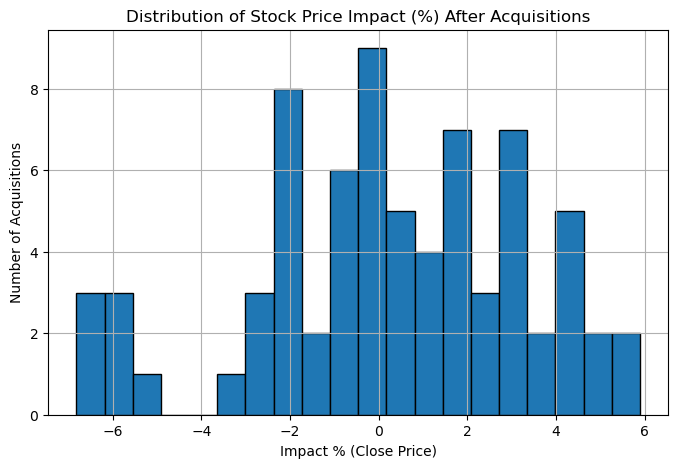

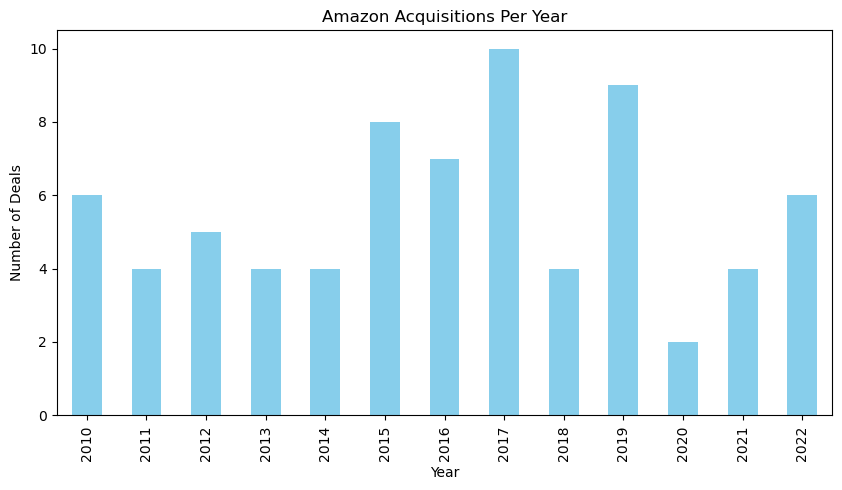

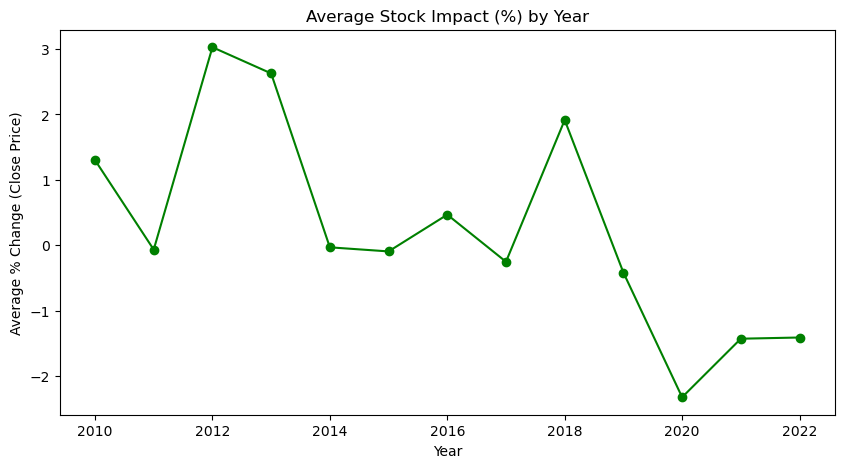


Top 5 Positive Impact Deals:
          company_name company_acquired_on  pct_change_close
15      IVONA Software          2013-01-24              5.89
33  Emvantage Payments          2016-02-16              5.33
23      Annapurna Labs          2015-01-22              5.11
71        Cloostermans          2022-09-09              5.11
10         Teachstreet          2012-02-02              4.57

Top 5 Negative Impact Deals:
                                         company_name company_acquired_on  \
56  Sizmek Ad Server and Sizmek Dynamic Creative O...          2019-05-31   
67                                           Strio.AI          2022-03-07   
68                                           GlowRoad          2022-04-21   
19                                         ComiXology          2014-04-10   
29                         Safaba Translation Systems          2015-09-25   

    pct_change_close  
56             -6.82  
67             -6.61  
68             -6.27  
19             -6.0

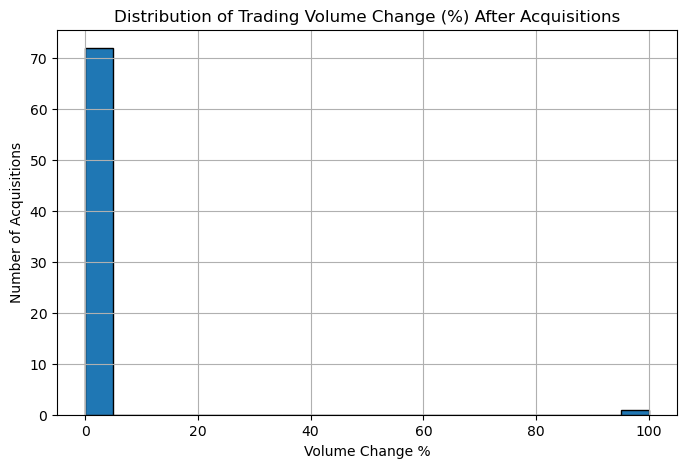


Top 10 Countries by Acquisitions:
company_country
United States           49
United Kingdom           7
India                    4
Israel                   3
United Arab Emirates     2
Spain                    1
Poland                   1
Netherlands              1
France                   1
Italy                    1
Name: count, dtype: int64

Average Stock Impact by Country (Top 10):
company_country
Poland                  5.890000
Belgium                 5.110000
Spain                   4.550000
Italy                   3.450000
Canada                  2.070000
Netherlands             1.820000
France                  1.780000
United Arab Emirates    0.910000
Israel                  0.566667
Sweden                  0.530000
Name: pct_change_close, dtype: float64


In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load exported SQL dataset
df = pd.read_csv("report.csv", parse_dates=["company_acquired_on","before_date","after_date"])

# --- 1. Basic Info ---
print("Total Rows:", len(df))
print("\nPreview of Dataset:\n", df.head())

# --- 2. Distribution of % change in close price ---
plt.figure(figsize=(8,5))
df["pct_change_close"].hist(bins=20, edgecolor='black')
plt.title("Distribution of Stock Price Impact (%) After Acquisitions")
plt.xlabel("Impact % (Close Price)")
plt.ylabel("Number of Acquisitions")
plt.show()

# --- 3. Deals per year ---
plt.figure(figsize=(10,5))
deals_by_year = df["acquisition_year"].value_counts().sort_index()
deals_by_year.plot(kind="bar", color="skyblue")
plt.title("Amazon Acquisitions Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Deals")
plt.show()

# --- 4. Average stock impact per year ---
plt.figure(figsize=(10,5))
impact_by_year = df.groupby("acquisition_year")["pct_change_close"].mean()
impact_by_year.plot(kind="line", marker="o", color="green")
plt.title("Average Stock Impact (%) by Year")
plt.xlabel("Year")
plt.ylabel("Average % Change (Close Price)")
plt.show()

# --- 5. Top positive/negative deals ---
print("\nTop 5 Positive Impact Deals:")
print(df[["company_name","company_acquired_on","pct_change_close"]]
      .sort_values("pct_change_close", ascending=False).head(5))

print("\nTop 5 Negative Impact Deals:")
print(df[["company_name","company_acquired_on","pct_change_close"]]
      .sort_values("pct_change_close").head(5))

# --- 7. Volume Change Distribution ---
plt.figure(figsize=(8,5))
df["pct_change_volume"].hist(bins=20, edgecolor='black')
plt.title("Distribution of Trading Volume Change (%) After Acquisitions")
plt.xlabel("Volume Change %")
plt.ylabel("Number of Acquisitions")
plt.show()

# --- 8. Country-level insights ---
print("\nTop 10 Countries by Acquisitions:")
print(df["company_country"].value_counts().head(10))

print("\nAverage Stock Impact by Country (Top 10):")
impact_by_country = df.groupby("company_country")["pct_change_close"].mean().sort_values(ascending=False)
print(impact_by_country.head(10))




